In [2]:
import pandas as pd
import gc
from google.colab import drive
drive.mount('/content/drive')

data_root = '/content/drive/MyDrive/부트캠프/'
data_path = data_root + '11_파이널/'

Mounted at /content/drive


In [2]:
df8 = pd.read_parquet(data_path + 'processed/df8.parquet')
df8

,기준년월,ID,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용금액_CA_전월,...,변동률_할부평잔,변동률_CA평잔,변동률_RVCA평잔,변동률_카드론평잔,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,Segment
0,201807,TRAIN_000000,0.364727,1.999996,0.0,0.000000,0.0,0.313300,1.999996,0.0,...,1.042805,0.999700,0.999998,0.999998,0.261886,0.270752,0.000000,1.044401,1.280543,D
1,201807,TRAIN_000001,-0.511808,0.000000,0.0,0.000000,0.0,-1.010817,0.000000,0.0,...,0.905663,0.999998,0.999998,0.999998,-0.563388,-0.670348,0.000000,0.000000,0.000000,E
2,201807,TRAIN_000002,0.067843,-1.999996,0.0,0.000000,0.0,0.289565,-1.999996,0.0,...,1.993590,0.852567,0.999998,0.999998,-0.046516,0.058114,-0.014191,0.524159,1.208420,C
3,201807,TRAIN_000003,0.153975,-1.999996,0.0,0.000000,0.0,0.276947,-0.138126,0.0,...,1.050646,0.999877,0.999998,0.999998,0.023821,0.258943,0.000000,0.880925,1.657124,D
4,201807,TRAIN_000004,0.000000,0.000000,0.0,0.000000,0.0,0.000028,0.000000,0.0,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0.000000,0.000000,0.0,-0.081943,0.0,0.000027,0.000000,0.0,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E
2399996,201812,TRAIN_399996,0.073804,0.000000,0.0,0.000000,0.0,0.207099,0.000000,0.0,...,0.999998,0.999998,0.999998,0.921733,-0.203251,-0.159143,0.000000,1.377071,2.533815,D
2399997,201812,TRAIN_399997,-0.040432,0.000000,0.0,0.000000,0.0,0.229573,-1.999996,0.0,...,0.345027,0.999998,0.999998,0.999998,0.027319,0.126581,0.000000,0.000000,0.000000,C
2399998,201812,TRAIN_399998,0.000000,0.000000,0.0,0.000000,0.0,0.000034,0.000000,0.0,...,0.999998,0.999998,0.999998,0.999998,0.000000,0.000000,0.000000,NaN,NaN,E


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# 그래프 기본 설정
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False
import matplotlib as mpl
import matplotlib.font_manager as fm

# 폰트 파일 경로 지정
font_path = '/content/drive/MyDrive/utils/NanumGothic.ttf'

# 폰트 등록 및 matplotlib 설정
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
mpl.rc('font', family=font_name)

In [5]:
hrm = df8['혜택수혜율_R3M'].median()
hbm = df8['혜택수혜율_B0M'].median()
df8['혜택수혜율_R3M'].fillna(hrm, inplace=True)
df8['혜택수혜율_B0M'].fillna(hbm, inplace=True)

In [6]:
df8['혜택수혜_100'] = (df8['혜택수혜율_R3M'] > 99) | (df8['혜택수혜율_B0M'] > 99)
df8['혜택수혜율_R3M'] = df8.loc[df8['혜택수혜율_R3M'] > 99, '혜택수혜율_R3M'] = hrm
df8['혜택수혜율_B0M'] = df8.loc[df8['혜택수혜율_B0M'] > 99, '혜택수혜율_B0M'] = hbm

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [9]:
rests = df8.iloc[:,22:30]
rests.columns

Index(['잔액_신판평균한도소진율_r6m', '잔액_신판최대한도소진율_r6m', '잔액_신판평균한도소진율_r3m',
       '잔액_신판최대한도소진율_r3m', '잔액_신판ca평균한도소진율_r6m', '잔액_신판ca최대한도소진율_r6m',
       '잔액_신판ca평균한도소진율_r3m', '잔액_신판ca최대한도소진율_r3m'],
      dtype='object')

In [16]:
ssc = StandardScaler()

def dimension_reduction(data, n_components=1):
    scaled_data = ssc.fit_transform(data)

    pca = PCA(n_components=n_components)
    pca.fit(scaled_data)
    rest_pca = pca.transform(scaled_data)

    # 주성분 분석 결과 출력
    print("주성분 비율:", pca.explained_variance_ratio_)
    print("주성분 벡터 (components):\n", pca.components_)

    # 주성분을 기준으로 변환된 데이터
    transformed_data = pca.transform(scaled_data)

    # 변환된 데이터 출력
    print("변환된 데이터 (주성분 공간):\n", transformed_data)
    return transformed_data

In [11]:
df8['잔액_한도소진율'] = transformed_data
df8.drop(rests.columns, axis=1, inplace=True)

In [12]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400000 entries, 0 to 2399999
Data columns (total 36 columns):
 #   Column           Dtype  
---  ------           -----  
 0   기준년월             int64  
 1   ID               object 
 2   증감율_이용건수_일시불_전월  float64
 3   증감율_이용건수_할부_전월   float64
 4   증감율_이용건수_CA_전월   float64
 5   증감율_이용건수_체크_전월   float64
 6   증감율_이용건수_카드론_전월  float64
 7   증감율_이용금액_일시불_전월  float64
 8   증감율_이용금액_할부_전월   float64
 9   증감율_이용금액_CA_전월   float64
 10  증감율_이용금액_체크_전월   float64
 11  증감율_이용금액_카드론_전월  float64
 12  증감율_이용건수_일시불_분기  float64
 13  증감율_이용건수_할부_분기   float64
 14  증감율_이용건수_CA_분기   float64
 15  증감율_이용건수_체크_분기   float64
 16  증감율_이용건수_카드론_분기  float64
 17  증감율_이용금액_일시불_분기  float64
 18  증감율_이용금액_할부_분기   float64
 19  증감율_이용금액_CA_분기   float64
 20  증감율_이용금액_체크_분기   float64
 21  증감율_이용금액_카드론_분기  float64
 22  변동률_일시불평잔        float64
 23  변동률_RV일시불평잔      float64
 24  변동률_할부평잔         float64
 25  변동률_CA평잔         float64
 26  변동률_RVCA평잔       float64
 27  변동률_카드론평잔   

In [13]:
df8['혜택수혜_100'] = df8['혜택수혜_100'].astype(int)

In [15]:
cardloan = df8[['증감율_이용건수_카드론_분기','증감율_이용금액_카드론_분기']]
cardloan

,증감율_이용건수_카드론_분기,증감율_이용금액_카드론_분기
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2399995,0.0,0.0
2399996,0.0,0.0
2399997,0.0,0.0
2399998,0.0,0.0


In [20]:
transformed_cardloan = dimension_reduction(data=cardloan, n_components=1)

주성분 비율: [1.]
주성분 벡터 (components):
 [[0.70710678 0.70710678]]
변환된 데이터 (주성분 공간):
 [[0.04914686]
 [0.04914686]
 [0.04914686]
 ...
 [0.04914686]
 [0.04914686]
 [0.04914686]]


In [21]:
df8['증감율_카드론_전월'] = transformed_cardloan
df8.drop(cardloan.columns, axis=1, inplace=True)
df8

,기준년월,ID,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용금액_CA_전월,...,변동률_잔액_B1M,변동률_잔액_일시불_B1M,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,Segment,혜택수혜_100,잔액_한도소진율,증감율_카드론_분기,증감율_카드론_전월
0,201807,TRAIN_000000,0.364727,1.999996,0.0,0.000000,0.0,0.313300,1.999996,0.0,...,0.261886,0.270752,0.000000,0.761199,0.985175,D,0,4.007244,0.143803,0.049147
1,201807,TRAIN_000001,-0.511808,0.000000,0.0,0.000000,0.0,-1.010817,0.000000,0.0,...,-0.563388,-0.670348,0.000000,0.761199,0.985175,E,0,7.310085,0.143803,0.049147
2,201807,TRAIN_000002,0.067843,-1.999996,0.0,0.000000,0.0,0.289565,-1.999996,0.0,...,-0.046516,0.058114,-0.014191,0.761199,0.985175,C,0,4.419537,0.143803,0.049147
3,201807,TRAIN_000003,0.153975,-1.999996,0.0,0.000000,0.0,0.276947,-0.138126,0.0,...,0.023821,0.258943,0.000000,0.761199,0.985175,D,0,6.565566,0.143803,0.049147
4,201807,TRAIN_000004,0.000000,0.000000,0.0,0.000000,0.0,0.000028,0.000000,0.0,...,0.000000,0.000000,0.000000,0.761199,0.985175,E,0,-2.046694,0.143803,0.049147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0.000000,0.000000,0.0,-0.081943,0.0,0.000027,0.000000,0.0,...,0.000000,0.000000,0.000000,0.761199,0.985175,E,0,-1.892714,0.143803,0.049147
2399996,201812,TRAIN_399996,0.073804,0.000000,0.0,0.000000,0.0,0.207099,0.000000,0.0,...,-0.203251,-0.159143,0.000000,0.761199,0.985175,D,0,-0.787997,0.143803,0.049147
2399997,201812,TRAIN_399997,-0.040432,0.000000,0.0,0.000000,0.0,0.229573,-1.999996,0.0,...,0.027319,0.126581,0.000000,0.761199,0.985175,C,0,-0.236287,0.143803,0.049147
2399998,201812,TRAIN_399998,0.000000,0.000000,0.0,0.000000,0.0,0.000034,0.000000,0.0,...,0.000000,0.000000,0.000000,0.761199,0.985175,E,0,-2.000366,0.143803,0.049147


In [19]:
cardloan = df8[['증감율_이용금액_카드론_전월','증감율_이용금액_카드론_전월']]
cardloan

,증감율_이용금액_카드론_전월,증감율_이용금액_카드론_전월
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
2399995,0.0,0.0
2399996,0.0,0.0
2399997,0.0,0.0
2399998,0.0,0.0


In [22]:
diff_rate = df8[['변동률_RVCA평잔','변동률_RV일시불평잔']]
diff_rate.corr()

,변동률_RVCA평잔,변동률_RV일시불평잔
변동률_RVCA평잔,1.000000,0.953904
변동률_RV일시불평잔,0.953904,1.000000


In [23]:
transformed_diff_rate = dimension_reduction(data=diff_rate, n_components=1)

주성분 비율: [0.97695221]
주성분 벡터 (components):
 [[0.70710678 0.70710678]]
변환된 데이터 (주성분 공간):
 [[0.32125684]
 [0.60653017]
 [0.34010997]
 ...
 [0.32125684]
 [0.32125684]
 [0.32125684]]


In [24]:
df8['변동률_RV평잔'] = transformed_diff_rate

In [25]:
pm_rate = df8[['증감율_이용금액_일시불_분기','증감율_이용건수_일시불_분기']]
pm_rate.corr()

,증감율_이용금액_일시불_분기,증감율_이용건수_일시불_분기
증감율_이용금액_일시불_분기,1.000000,0.953712
증감율_이용건수_일시불_분기,0.953712,1.000000


In [26]:
pm_transformed = dimension_reduction(data=pm_rate, n_components=1)

주성분 비율: [0.976856]
주성분 벡터 (components):
 [[0.70710678 0.70710678]]
변환된 데이터 (주성분 공간):
 [[-0.78631603]
 [ 1.12110627]
 [ 0.12908887]
 ...
 [-0.21107744]
 [ 0.19948651]
 [ 0.85514963]]


In [27]:
df8['증감율_일시불_분기'] = pm_transformed

In [28]:
df8.drop(pm_rate.columns, axis=1, inplace=True)
df8.drop(diff_rate.columns, axis=1, inplace=True)
df8.drop(cardloan.columns, axis=1, inplace=True)

KeyError: "['증감율_이용금액_카드론_전월', '증감율_이용금액_카드론_전월'] not found in axis"

In [30]:
df8.columns

Index(['기준년월', 'ID', '증감율_이용건수_일시불_전월', '증감율_이용건수_할부_전월', '증감율_이용건수_CA_전월',
       '증감율_이용건수_체크_전월', '증감율_이용건수_카드론_전월', '증감율_이용금액_일시불_전월',
       '증감율_이용금액_할부_전월', '증감율_이용금액_CA_전월', '증감율_이용금액_체크_전월', '증감율_이용건수_할부_분기',
       '증감율_이용건수_CA_분기', '증감율_이용건수_체크_분기', '증감율_이용금액_할부_분기', '증감율_이용금액_CA_분기',
       '증감율_이용금액_체크_분기', '변동률_일시불평잔', '변동률_할부평잔', '변동률_CA평잔', '변동률_카드론평잔',
       '변동률_잔액_B1M', '변동률_잔액_일시불_B1M', '변동률_잔액_CA_B1M', '혜택수혜율_R3M',
       '혜택수혜율_B0M', 'Segment', '혜택수혜_100', '잔액_한도소진율', '증감율_카드론_분기',
       '증감율_카드론_전월', '변동률_RV평잔', '증감율_일시불_분기'],
      dtype='object')

In [32]:
pm_check = df8[['증감율_이용금액_체크_분기','증감율_이용건수_체크_분기']]
pm_check.corr()

,증감율_이용금액_체크_분기,증감율_이용건수_체크_분기
증감율_이용금액_체크_분기,1.000000,0.963474
증감율_이용건수_체크_분기,0.963474,1.000000


In [33]:
transformed_data = dimension_reduction(data=pm_check, n_components=1)

주성분 비율: [0.98173706]
주성분 벡터 (components):
 [[0.70710678 0.70710678]]
변환된 데이터 (주성분 공간):
 [[-7.89389814]
 [ 0.08636192]
 [ 0.08636192]
 ...
 [ 0.08636192]
 [ 0.08636192]
 [ 0.08636192]]


In [34]:
df8['증감율_체크_분기'] = transformed_data
df8.drop(pm_check.columns, axis=1, inplace=True)
df8

,기준년월,ID,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용금액_CA_전월,...,혜택수혜율_R3M,혜택수혜율_B0M,Segment,혜택수혜_100,잔액_한도소진율,증감율_카드론_분기,증감율_카드론_전월,변동률_RV평잔,증감율_일시불_분기,증감율_체크_분기
0,201807,TRAIN_000000,0.364727,1.999996,0.0,0.000000,0.0,0.313300,1.999996,0.0,...,0.761199,0.985175,D,0,4.007244,0.143803,0.049147,0.321257,-0.786316,-7.893898
1,201807,TRAIN_000001,-0.511808,0.000000,0.0,0.000000,0.0,-1.010817,0.000000,0.0,...,0.761199,0.985175,E,0,7.310085,0.143803,0.049147,0.606530,1.121106,0.086362
2,201807,TRAIN_000002,0.067843,-1.999996,0.0,0.000000,0.0,0.289565,-1.999996,0.0,...,0.761199,0.985175,C,0,4.419537,0.143803,0.049147,0.340110,0.129089,0.086362
3,201807,TRAIN_000003,0.153975,-1.999996,0.0,0.000000,0.0,0.276947,-0.138126,0.0,...,0.761199,0.985175,D,0,6.565566,0.143803,0.049147,0.321257,0.429789,0.086362
4,201807,TRAIN_000004,0.000000,0.000000,0.0,0.000000,0.0,0.000028,0.000000,0.0,...,0.761199,0.985175,E,0,-2.046694,0.143803,0.049147,0.321257,-4.563909,-1.516720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,0.000000,0.000000,0.0,-0.081943,0.0,0.000027,0.000000,0.0,...,0.761199,0.985175,E,0,-1.892714,0.143803,0.049147,0.321257,0.199487,-0.212814
2399996,201812,TRAIN_399996,0.073804,0.000000,0.0,0.000000,0.0,0.207099,0.000000,0.0,...,0.761199,0.985175,D,0,-0.787997,0.143803,0.049147,0.321257,-1.551169,0.086362
2399997,201812,TRAIN_399997,-0.040432,0.000000,0.0,0.000000,0.0,0.229573,-1.999996,0.0,...,0.761199,0.985175,C,0,-0.236287,0.143803,0.049147,0.321257,-0.211077,0.086362
2399998,201812,TRAIN_399998,0.000000,0.000000,0.0,0.000000,0.0,0.000034,0.000000,0.0,...,0.761199,0.985175,E,0,-2.000366,0.143803,0.049147,0.321257,0.199487,0.086362


In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calculate_vif(X):
    X = add_constant(X)  # 상수항 추가 (intercept)
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

In [36]:
del cardloan
del diff_rate
del transformed_diff_rate
del pm_rate
del pm_transformed
del pm_check
del transformed_data
gc.collect()

41

In [37]:
numeric_cols = df8.select_dtypes(include='number')
vif_result = calculate_vif(numeric_cols)
print(vif_result)

            feature           VIF
0              기준년월  1.049783e+00
1   증감율_이용건수_일시불_전월  2.247495e+00
2    증감율_이용건수_할부_전월  1.634549e+00
3    증감율_이용건수_CA_전월  1.524657e+00
4    증감율_이용건수_체크_전월  1.311825e+00
5   증감율_이용건수_카드론_전월  1.702939e+01
6   증감율_이용금액_일시불_전월  1.833737e+00
7    증감율_이용금액_할부_전월  1.598008e+00
8    증감율_이용금액_CA_전월  1.636139e+00
9    증감율_이용금액_체크_전월  1.327247e+00
10   증감율_이용건수_할부_분기  4.017846e+00
11   증감율_이용건수_CA_분기  4.730810e+00
12   증감율_이용금액_할부_분기  4.148281e+00
13   증감율_이용금액_CA_분기  4.541954e+00
14        변동률_일시불평잔  4.591274e+00
15         변동률_할부평잔  1.740281e+00
16         변동률_CA평잔  6.061224e+00
17        변동률_카드론평잔  4.157971e+00
18       변동률_잔액_B1M  2.861717e+00
19   변동률_잔액_일시불_B1M  3.310682e+00
20    변동률_잔액_CA_B1M  1.219659e+00
21        혜택수혜율_R3M  1.157943e-09
22        혜택수혜율_B0M  4.783350e-09
23         혜택수혜_100  1.033728e+00
24         잔액_한도소진율  1.146995e+00
25       증감율_카드론_분기  1.066225e+00
26       증감율_카드론_전월  1.710364e+01
27         변동률_RV평잔  7.916767e+00
28       증감율_일

In [38]:
numeric_cols.corr()

,기준년월,증감율_이용건수_일시불_전월,증감율_이용건수_할부_전월,증감율_이용건수_CA_전월,증감율_이용건수_체크_전월,증감율_이용건수_카드론_전월,증감율_이용금액_일시불_전월,증감율_이용금액_할부_전월,증감율_이용금액_CA_전월,증감율_이용금액_체크_전월,...,변동률_잔액_CA_B1M,혜택수혜율_R3M,혜택수혜율_B0M,혜택수혜_100,잔액_한도소진율,증감율_카드론_분기,증감율_카드론_전월,변동률_RV평잔,증감율_일시불_분기,증감율_체크_분기
기준년월,1.000000,0.000846,0.058424,0.060519,0.061538,0.048938,0.008799,0.031694,0.053786,0.046993,...,0.039949,NaN,NaN,0.001684,-0.055298,-0.018469,0.049867,-0.004327,-0.134240,-0.007920
증감율_이용건수_일시불_전월,0.000846,1.000000,0.088149,0.008447,-0.002224,-0.000758,0.653132,0.096147,0.006958,0.001405,...,-0.003742,NaN,NaN,0.010210,-0.006694,0.004921,-0.000595,-0.019308,-0.034554,0.004200
증감율_이용건수_할부_전월,0.058424,0.088149,1.000000,0.040903,0.020261,0.018915,0.044886,0.606438,0.028253,0.007749,...,0.017083,NaN,NaN,0.029132,-0.158068,0.020834,0.020134,-0.042962,-0.036773,0.002381
증감율_이용건수_CA_전월,0.060519,0.008447,0.040903,1.000000,0.017631,0.045471,-0.000814,0.010527,0.570374,0.006969,...,0.295128,NaN,NaN,0.011579,-0.110374,0.016947,0.047357,-0.023226,-0.025525,0.001932
증감율_이용건수_체크_전월,0.061538,-0.002224,0.020261,0.017631,1.000000,0.008490,-0.005738,0.009443,0.009186,0.445943,...,0.007359,NaN,NaN,0.008111,-0.061993,0.000921,0.008466,-0.017379,-0.033602,-0.327123
증감율_이용건수_카드론_전월,0.048938,-0.000758,0.018915,0.045471,0.008490,1.000000,-0.001741,0.005657,0.040248,0.005666,...,0.018088,NaN,NaN,0.001588,-0.021946,-0.228240,0.970181,-0.009937,-0.019234,-0.001810
증감율_이용금액_일시불_전월,0.008799,0.653132,0.044886,-0.000814,-0.005738,-0.001741,1.000000,0.066780,0.003256,0.000867,...,-0.007546,NaN,NaN,-0.040200,0.084009,0.001237,-0.001685,0.046775,-0.008012,-0.000308
증감율_이용금액_할부_전월,0.031694,0.096147,0.606438,0.010527,0.009443,0.005657,0.066780,1.000000,0.008983,0.003670,...,0.001931,NaN,NaN,0.015897,-0.068050,0.007416,0.006324,-0.024615,-0.027810,0.002469
증감율_이용금액_CA_전월,0.053786,0.006958,0.028253,0.570374,0.009186,0.040248,0.003256,0.008983,1.000000,0.003924,...,0.393721,NaN,NaN,0.006599,-0.061572,0.007152,0.042466,-0.015541,-0.024258,0.002879
증감율_이용금액_체크_전월,0.046993,0.001405,0.007749,0.006969,0.445943,0.005666,0.000867,0.003670,0.003924,1.000000,...,0.005128,NaN,NaN,0.003257,-0.016914,0.000432,0.005416,-0.005195,-0.018693,-0.350968


In [39]:
df8.to_parquet(data_path + 'processed/df80.parquet', index=False)

In [6]:
dm = pd.get_dummies(df8['Segment'])

In [7]:
i = 4
c = df8.columns[i]
d = df8.iloc[:,i]

In [8]:
dmc = pd.concat([d,dm], axis=1)

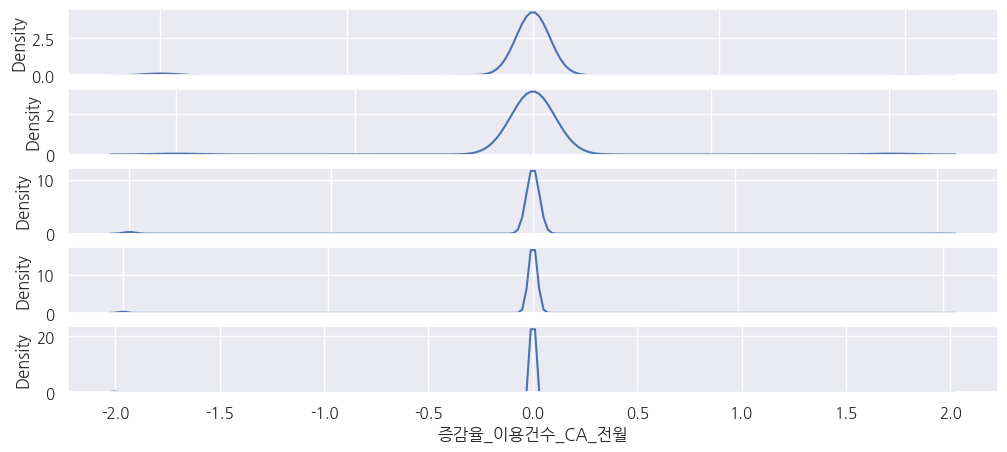

In [9]:
d0 = dmc.loc[dmc['A'], c]
d1 = dmc.loc[dmc['B'], c]
d2 = dmc.loc[dmc['C'], c]
d3 = dmc.loc[dmc['D'], c]
d4 = dmc.loc[dmc['E'], c]
plt.subplot(6,1,1)
f0 = sns.kdeplot(data=d0)
plt.subplot(6,1,2)
f1 = sns.kdeplot(data=d1)
plt.subplot(6,1,3)
f2 = sns.kdeplot(data=d2)
plt.subplot(6,1,4)
f3 = sns.kdeplot(data=d3)
plt.subplot(6,1,5)
f4 = sns.kdeplot(data=d4)
plt.show()

In [4]:
df8 = pd.read_parquet(data_path + 'processed/df80.parquet')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


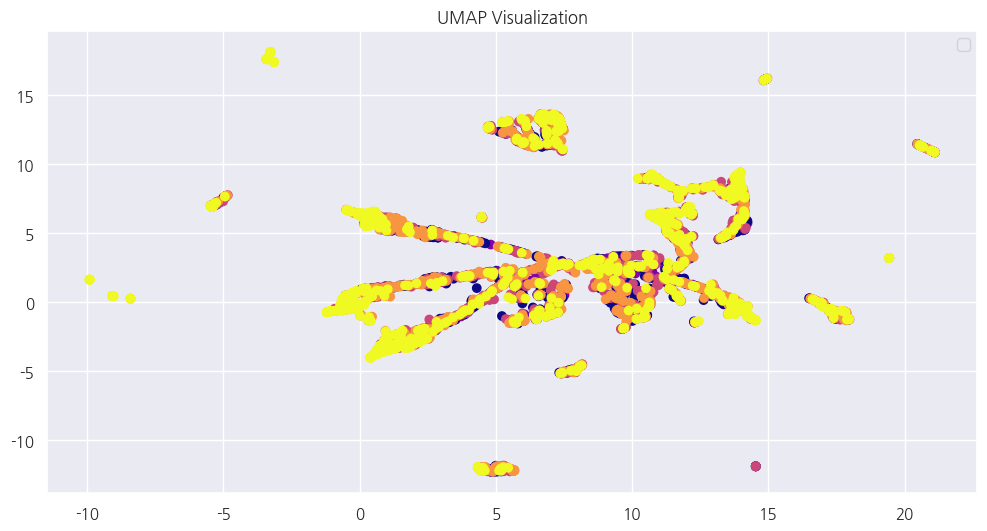

In [5]:
import umap.umap_ as umap
from sklearn.preprocessing import LabelEncoder

class_counts = df8['Segment'].value_counts()
rare_classes = class_counts[class_counts < 1000].index
common_classes = class_counts[class_counts >= 1000].index

# 소수 클래스는 전부 사용
df_rare = df8[df8['Segment'].isin(rare_classes)]

# 다수 클래스는 일정 수만 샘플링 (예: 1000개씩)
df_common = df8[df8['Segment'].isin(common_classes)].groupby('Segment').sample(n=1000, random_state=42)

# 병합
df_emphasized = pd.concat([df_rare, df_common], ignore_index=True)

le = LabelEncoder()

seg = df_emphasized['Segment']
y = le.fit_transform(seg)
X = df_emphasized.drop(['Segment', 'ID'], axis=1)

umap_model = umap.UMAP(n_components=2)
X_umap = umap_model.fit_transform(X)

plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='plasma')
plt.title('UMAP Visualization')
plt.legend()
plt.show()

In [13]:
dsc = df8.describe()
dmin = dsc.loc['min',:]
dmax = dsc.loc['max',:]
ddiff = dmax - dmin
print(ddiff)

기준년월                5.000000
증감율_이용건수_일시불_전월     3.999992
증감율_이용건수_할부_전월      3.999992
증감율_이용건수_CA_전월      3.999992
증감율_이용건수_체크_전월      1.933333
증감율_이용건수_카드론_전월     1.999996
증감율_이용금액_일시불_전월     4.007154
증감율_이용금액_할부_전월      3.999992
증감율_이용금액_CA_전월      3.999992
증감율_이용금액_체크_전월      3.999992
증감율_이용건수_할부_분기      3.999992
증감율_이용건수_CA_분기      3.999992
증감율_이용금액_할부_분기      3.999992
증감율_이용금액_CA_분기      3.999992
변동률_일시불평잔           2.062496
변동률_할부평잔            1.997502
변동률_CA평잔            1.996579
변동률_카드론평잔           2.000152
변동률_잔액_B1M          3.999992
변동률_잔액_일시불_B1M      3.999992
변동률_잔액_CA_B1M       3.999992
혜택수혜율_R3M           0.000000
혜택수혜율_B0M           0.000000
혜택수혜_100            1.000000
잔액_한도소진율           14.033182
증감율_카드론_분기         18.636595
증감율_카드론_전월         40.743509
변동률_RV평잔           10.001196
증감율_일시불_분기         10.416524
증감율_체크_분기          15.960520
dtype: float64


In [17]:
dmin

,min
기준년월,201807.000000
증감율_이용건수_일시불_전월,-1.999996
증감율_이용건수_할부_전월,-1.999996
증감율_이용건수_CA_전월,-1.999996
증감율_이용건수_체크_전월,-1.199311
증감율_이용건수_카드론_전월,-1.999996
증감율_이용금액_일시불_전월,-2.003836
증감율_이용금액_할부_전월,-1.999996
증감율_이용금액_CA_전월,-1.999996
증감율_이용금액_체크_전월,-1.999996


In [20]:
df_test = pd.read_parquet(data_path + 'train/8.성과정보/201807_train_성과정보.parquet')
df_test['혜택수혜율_B0M'].fillna(df_test['혜택수혜율_B0M'].median(), inplace=True)
df_test['혜택수혜율_B0M'].describe()

,혜택수혜율_B0M
count,400000.000000
mean,4.270215
std,17.094940
min,-1.832605
25%,0.000000
50%,0.844587
75%,2.017476
max,99.999800
